In [1]:
from Module.data_processing import load_data, clean_data, preprocess_data
from Module.model_evaluation import *
from Module.neural_network import build_cnn_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

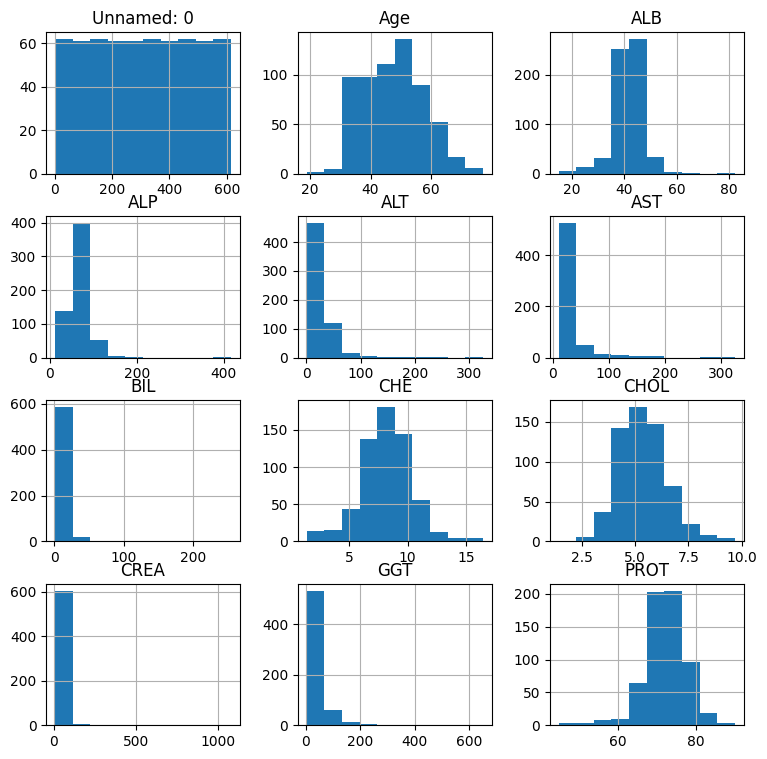

In [2]:
file_path = "hcvdat0.csv"
data = load_data(file_path)

data.hist(figsize=(9, 9))
plt.show()

In [3]:
cleaned_data = clean_data(data)
X = cleaned_data.drop('Category', axis=1)
y = cleaned_data['Category']
random_state_value =42
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(X, y, test_size=0.2, random_state=random_state_value)

In [4]:
print("\nKNN Classifier (Before Preprocessing):")
knn_classifier_before = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_before, knn_precision_before, knn_recall_before, knn_f1_before = train_and_evaluate_ml_before(
    knn_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)


KNN Classifier (Before Preprocessing):


ValueError: could not convert string to float: 'm'

In [ ]:
print("\nRandom Forest Classifier (Before Preprocessing):")
rf_classifier_before = RandomForestClassifier(random_state=42)
rf_accuracy_before, rf_precision_before, rf_recall_before, rf_f1_before = train_and_evaluate_ml_before(
    rf_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)

In [ ]:
print("\nSVM Classifier (Before Preprocessing):")
svm_classifier_before = SVC(random_state=42)
svm_accuracy_before, svm_precision_before, svm_recall_before, svm_f1_before = train_and_evaluate_ml_before(
    svm_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)

In [ ]:
print("\nNeural Network (Before Preprocessing):")
X_train_resampled, X_test_imputed, y_train_resampled, y_test = preprocess_data(X, y)
num_classes = len(np.unique(y_train_resampled))
input_shape = (X_train_resampled.shape[1], 1)
X_train_reshaped = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_reshaped = X_test_imputed.values.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)
model = build_cnn_model(input_shape, num_classes)
nn_accuracy_before, nn_precision_before, nn_recall_before, nn_f1_before, nn_roc_auc_before = train_and_evaluate_nn(model, X_train_reshaped, y_train_resampled, X_test_reshaped, y_test, epochs=20, batch_size=32)

In [ ]:
print("\nCNN (Before Preprocessing):")
X_train_resampled, X_test_imputed, y_train_resampled, y_test = preprocess_data(X, y)
num_classes = len(np.unique(y_train_resampled))
input_shape = (X_train_resampled.shape[1], 1)
X_train_reshaped = X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_reshaped = X_test_imputed.values.reshape(X_test_imputed.shape[0], X_test_imputed.shape[1], 1)
model = build_cnn_model(input_shape, num_classes)
cnn_accuracy_before, cnn_precision_before, cnn_recall_before, cnn_f1_before, cnn_roc_auc_before = train_and_evaluate_cnn(model, X_train_reshaped, y_train_resampled, X_test_reshaped, y_test, epochs=20, batch_size=32)

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(X, y)

In [ ]:
print("\nKNN Classifier (After Preprocessing):")
knn_classifier_after = KNeighborsClassifier(n_neighbors=5)
knn_accuracy_after, knn_precision_after, knn_recall_after, knn_f1_after, _ = train_and_evaluate_ml(
    knn_classifier_after, X_train, X_test, y_train, y_test)

In [ ]:
print("\nDecision Tree Classifier (Before Preprocessing):")
dt_classifier_before = DecisionTreeClassifier(random_state=42)
dt_accuracy_before, dt_precision_before, dt_recall_before, dt_f1_before = train_and_evaluate_ml_before(
    dt_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)

In [ ]:
print("\nRandom Forest Classifier (Before Preprocessing):")
rf_classifier_before = RandomForestClassifier(random_state=42)
rf_accuracy_before, rf_precision_before, rf_recall_before, rf_f1_before = train_and_evaluate_ml_before(
    rf_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)

In [ ]:
print("\nSVM Classifier (Before Preprocessing):")
svm_classifier_before = SVC(random_state=42)
svm_accuracy_before, svm_precision_before, svm_recall_before, svm_f1_before = train_and_evaluate_ml_before(
    svm_classifier_before, X_train_before, X_test_before, y_train_before, y_test_before)

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = preprocess_data(X, y)

In [ ]:
print("\nNeural Network Classifier (After Preprocessing):")
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_nn.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(num_classes, activation='softmax'))  
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_accuracy_after, nn_precision_after, nn_recall_after, nn_f1_after, nn_roc_auc_after = train_and_evaluate_nn(model_nn, X_train_nn, y_train_nn, X_test_nn, y_test_nn)

In [ ]:
input_shape_cnn = (X_train_nn.shape[1], 1) 
X_train_nn_cnn = X_train_nn.values.reshape(X_train_nn.shape[0], X_train_nn.shape[1], 1)
X_test_nn_cnn = X_test_nn.values.reshape(X_test_nn.shape[0], X_test_nn.shape[1], 1)
print("\nCNN Classifier (After Preprocessing):")
cnn_model_after = build_cnn_model(input_shape_cnn, num_classes)
cnn_accuracy_after, cnn_precision_after, cnn_recall_after, cnn_f1_after, _ = train_and_evaluate_nn(cnn_model_after, X_train_nn_cnn, y_train_nn, X_test_nn_cnn, y_test_nn)
